# **MARKET SEGMENT ANALYSIS FOR MALL**

In [63]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [64]:
df = pd.read_csv('/content/shopping_trends.csv')

In [65]:
print(f'Count of rows : {df.shape[0]}, Count of columns : {df.shape[1]}')

Count of rows : 3900, Count of columns : 19


In [66]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## DATA CLEANING

In [67]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [68]:
#dropping unwanted columns
df.drop(columns = ['Customer ID'], inplace = True)

In [69]:
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [70]:
df.isna().sum()

Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [71]:
df.drop_duplicates(inplace = True)

In [72]:
print(f'Count of rows : {df.shape[0]}, Count of columns : {df.shape[1]}')

Count of rows : 3900, Count of columns : 18


## EDA (EXPLORATORY DATA ANALYSIS)

### 1. DISTRIBUTION OF AGE

<ipython-input-73-d66c4dc58cdc>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




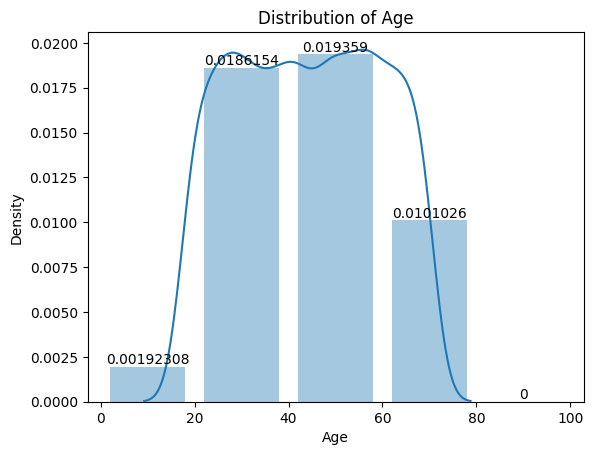

In [73]:
age = sns.distplot(df['Age'], hist_kws = {'rwidth' : 0.8}, bins = np.array([0, 20, 40, 60, 80, 100]));
plt.title('Distribution of Age');
for bars in age.containers:
  age.bar_label(bars)

Conclusion 1 : Mostly people shopping from this mall belongs to age group 40-60 followed by 20-40

## 2. GENDER DISTRIBUTION

In [74]:
px.pie(df, names = 'Gender', title = 'Gender Distribution')

Conclusiom 2 : Maximum purchases are made by 'Males'

## 3. MOST COMMONLY PURCHASED ITEMS

In [75]:
item_counts = df['Item Purchased'].value_counts().reset_index()

In [76]:
item_counts.columns = ['Item Purchased', 'Count']

In [77]:
px.bar(item_counts,
       x = 'Item Purchased',
       y = 'Count',
       title = 'Most commonly purchased items')

Conclusion 3: 'Blouse' is the most purchased item followed by 'Jwelery' and 'Pants' while the 'jeans' are the least preferred one

## 4. SEASONWISE SHOPPING DISTRIBUTION

In [78]:
px.pie(df, names = 'Season', title = 'Season Distribution')

Conclusion 4 : People mostly shop in the season of 'Spring' and 'Fall'

## 5. LOCATION DISTRIBUTION

In [79]:
item_counts = df['Location'].value_counts().reset_index()

In [80]:
px.bar(item_counts,
       x = 'Location',
       y = 'count',
       title = 'Location Distribution')

Conclusion 5: Mostly the people prefer shopping from 'montana' outlet followed by ' California outlet'

## 6. PREFERRED PAYMENT METHOD

In [81]:
px.pie(df, names = 'Preferred Payment Method', title = 'Preferred payment method')

Conclusion 6: 'PayPal' and 'Credit Card' are the most preferred payment methods

## 7. FREQUENCY OF PURCHASES DISTRIBUTION

In [82]:
px.histogram(df,
             x = 'Frequency of Purchases',
             title = 'Frequency of puchases distribution')

Conclusion 7 : Most people prefer shopping after every 3 months

## 8. PROMO CODE USAGE DISTRIBUTION

In [83]:
px.pie(df, names = 'Promo Code Used', title = 'PROMO CODE USAGE DISTRIBUTION')

Conclusion 8 : Majority people do shopping without using any Promo Code

## 9. SHIPPING TYPE DISTRIBUTION

In [84]:
px.pie(df, names = 'Shipping Type', title=' SHIPPING TYPE DISTRIBUTION')

Conclusion 9: Mostly people do 'Free shipping'

## 10. AVERAGE REVIEW RATING GENDERWISE

In [85]:
px.box(df,
           x = 'Gender',
           y = 'Review Rating',
           title = ' AVERAGE REVIEW RATING GENDERWISE')

Conclusion 10: Average rating by Male > average rating by female

## 11. COLOR PREFERENCE DISTRIBUTION

In [86]:
px.pie(df, names = 'Color', title = 'COLOR PREFERENCE DISTRIBUTION')

Conclusion 11: Mostly people shop for 'olive' color followed by ''yellow'

## 12. CATEGORY BY GENDER AND PAYMENT METHOD

In [87]:
px.sunburst(df, path = ['Gender', 'Category', 'Payment Method'],
            values = 'Purchase Amount (USD)',
            title = 'CATEGORY BY GENDER AND PAYMENT METHOD')

Conclsion 12:
- Mostly the shopping is done by 'Male'
- Mostly the men/female shop for Clothing followed by accessories
- The most preferred payment method for male is 'credit card' and for female it is 'Venmo'

### MACHINE LEARNING - CLUSTERING

In [88]:
cat_cols = df.select_dtypes('object').columns.tolist()

In [89]:
df_encoded = (pd.get_dummies(df, columns= cat_cols)).astype('int')

In [90]:
df_encoded.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,...,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,53,3,14,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,19,64,3,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,50,73,3,23,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,21,90,3,49,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,45,49,2,31,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [92]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

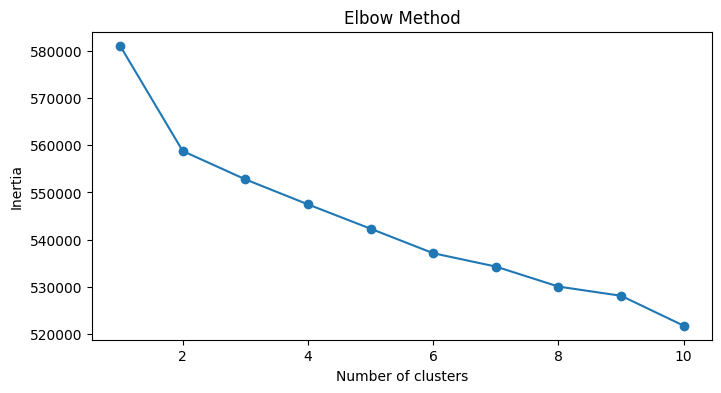

In [93]:
# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4));
plt.plot(range(1, 11), inertia, marker='o');
plt.title('Elbow Method');
plt.xlabel('Number of clusters');
plt.ylabel('Inertia');

The optimal Value = 2

In [94]:
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)

In [95]:
df_encoded['Cluster'] = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [96]:
df_encoded['Cluster'].unique()

array([1, 0], dtype=int32)

In [97]:
df_encoded.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,...,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,Cluster
0,55,53,3,14,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,19,64,3,2,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,50,73,3,23,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,21,90,3,49,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,45,49,2,31,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1


In [98]:
# Summarize each cluster
cluster_summary = df_encoded.groupby('Cluster').mean()

print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
                Age  Purchase Amount (USD)  Review Rating  Previous Purchases  \
Cluster                                                                        
0        44.010796              60.130454       3.268556           25.056230   
1        44.144902              59.279070       3.256410           25.742993   

         Gender_Female  Gender_Male  Item Purchased_Backpack  \
Cluster                                                        
0             0.561404     0.438596                 0.035538   
1             0.000000     1.000000                 0.038163   

         Item Purchased_Belt  Item Purchased_Blouse  Item Purchased_Boots  \
Cluster                                                                     
0                   0.040036               0.050832              0.034638   
1                   0.042934               0.034586              0.039952   

         ...  Preferred Payment Method_Debit Card  \
Cluster  ...                              

### KEY TAKEWAYS:
- Demographics: Both clusters have similar age distributions.
Spending and Satisfaction: Both clusters exhibit similar spending patterns and customer satisfaction levels.
- Gender Distribution: Cluster 1 is exclusively male, whereas Cluster 0 includes both genders with a higher proportion of females.
- Product Preferences: There are slight variations in product preferences between the clusters, with Cluster 0 having a higher percentage of blouse purchases.
- Payment Methods: Preferences for PayPal and Venmo are relatively close in both clusters, indicating similar payment behavior.

### MARKETING STRATEGIES

- Targeting Gender: Cluster 0 could benefit from more female-oriented marketing, whereas Cluster 1 should focus on male customers.
- Product Promotion: Promotions for blouses might be more effective in Cluster 0.
- Payment Options: Ensuring that preferred payment methods like PayPal and Venmo are highlighted in marketing campaigns for both clusters.